# Solar-MACH
**Multi-spacecraft longitudinal configuration plotter**

The Solar MAgnetic Connection Haus tool (Solar-MACH) is an open-source tool completely written in Python that derives and visualizes the spatial configuration and solar magnetic connection of different observers (i.e., spacecraft or planets) in the heliosphere at different times. For this, the magnetic connection in the interplanetary space is obtained by the classic Parker Heliospheric Magnetic Field (HMF), while in close vicinity of the Sun a Potential Field Source Surface (PFSS) model can be applied to connect the HMF to the solar corona.

- GitHub: https://github.com/jgieseler/solarmach
- PyPI: https://pypi.org/project/solarmach
- conda: https://anaconda.org/conda-forge/solarmach
- web app: https://solar-mach.github.io
---

### Table of Contents

* [1. Minimal example](#Minimal_example)
* [2. Example with all the details](#Example_all_details)
* [3. Example using Stonyhurst coordinates for reference](#Example_stonyhurst)
* [4. Only obtain data as Pandas DataFrame](#only_dataframe)
* [5. Advanced: edit the figure](#edit_figure)
* [6. Ideas for further usage](#ideas_further_usage)
    * [6.1 Loop over multiple datetimes (plots)](#loop_datetimes_plots)
    * [6.2 Loop over multiple datetimes (only data)](#loop_datetimes_data)
* [7. Further backmapping with PFSS](#pfss)    
---

## Local installation

In order to run it locally on your computer, you need to install `solarmach` via pip:
``` bash
$ pip install solarmach
```

or via conda:
``` bash
$ conda install -c conda-forge solarmach
```
---

## Importing 

In [1]:
from solarmach import SolarMACH, print_body_list

---
## 1. Minimal example <a class="anchor" id="Minimal_example"></a>

Necessary options are a list of wanted spacecraft/bodies, the corresponding solar wind speeds (in km/s), and the date of interest:

In [2]:
body_list = ['Earth', 'Solar Orbiter', 'PSP']
vsw_list = [400, 400, 400]    # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Initialize the SolarMACH object for these options:

In [3]:
sm1 = SolarMACH(date, body_list, vsw_list)

And produce the final plot:

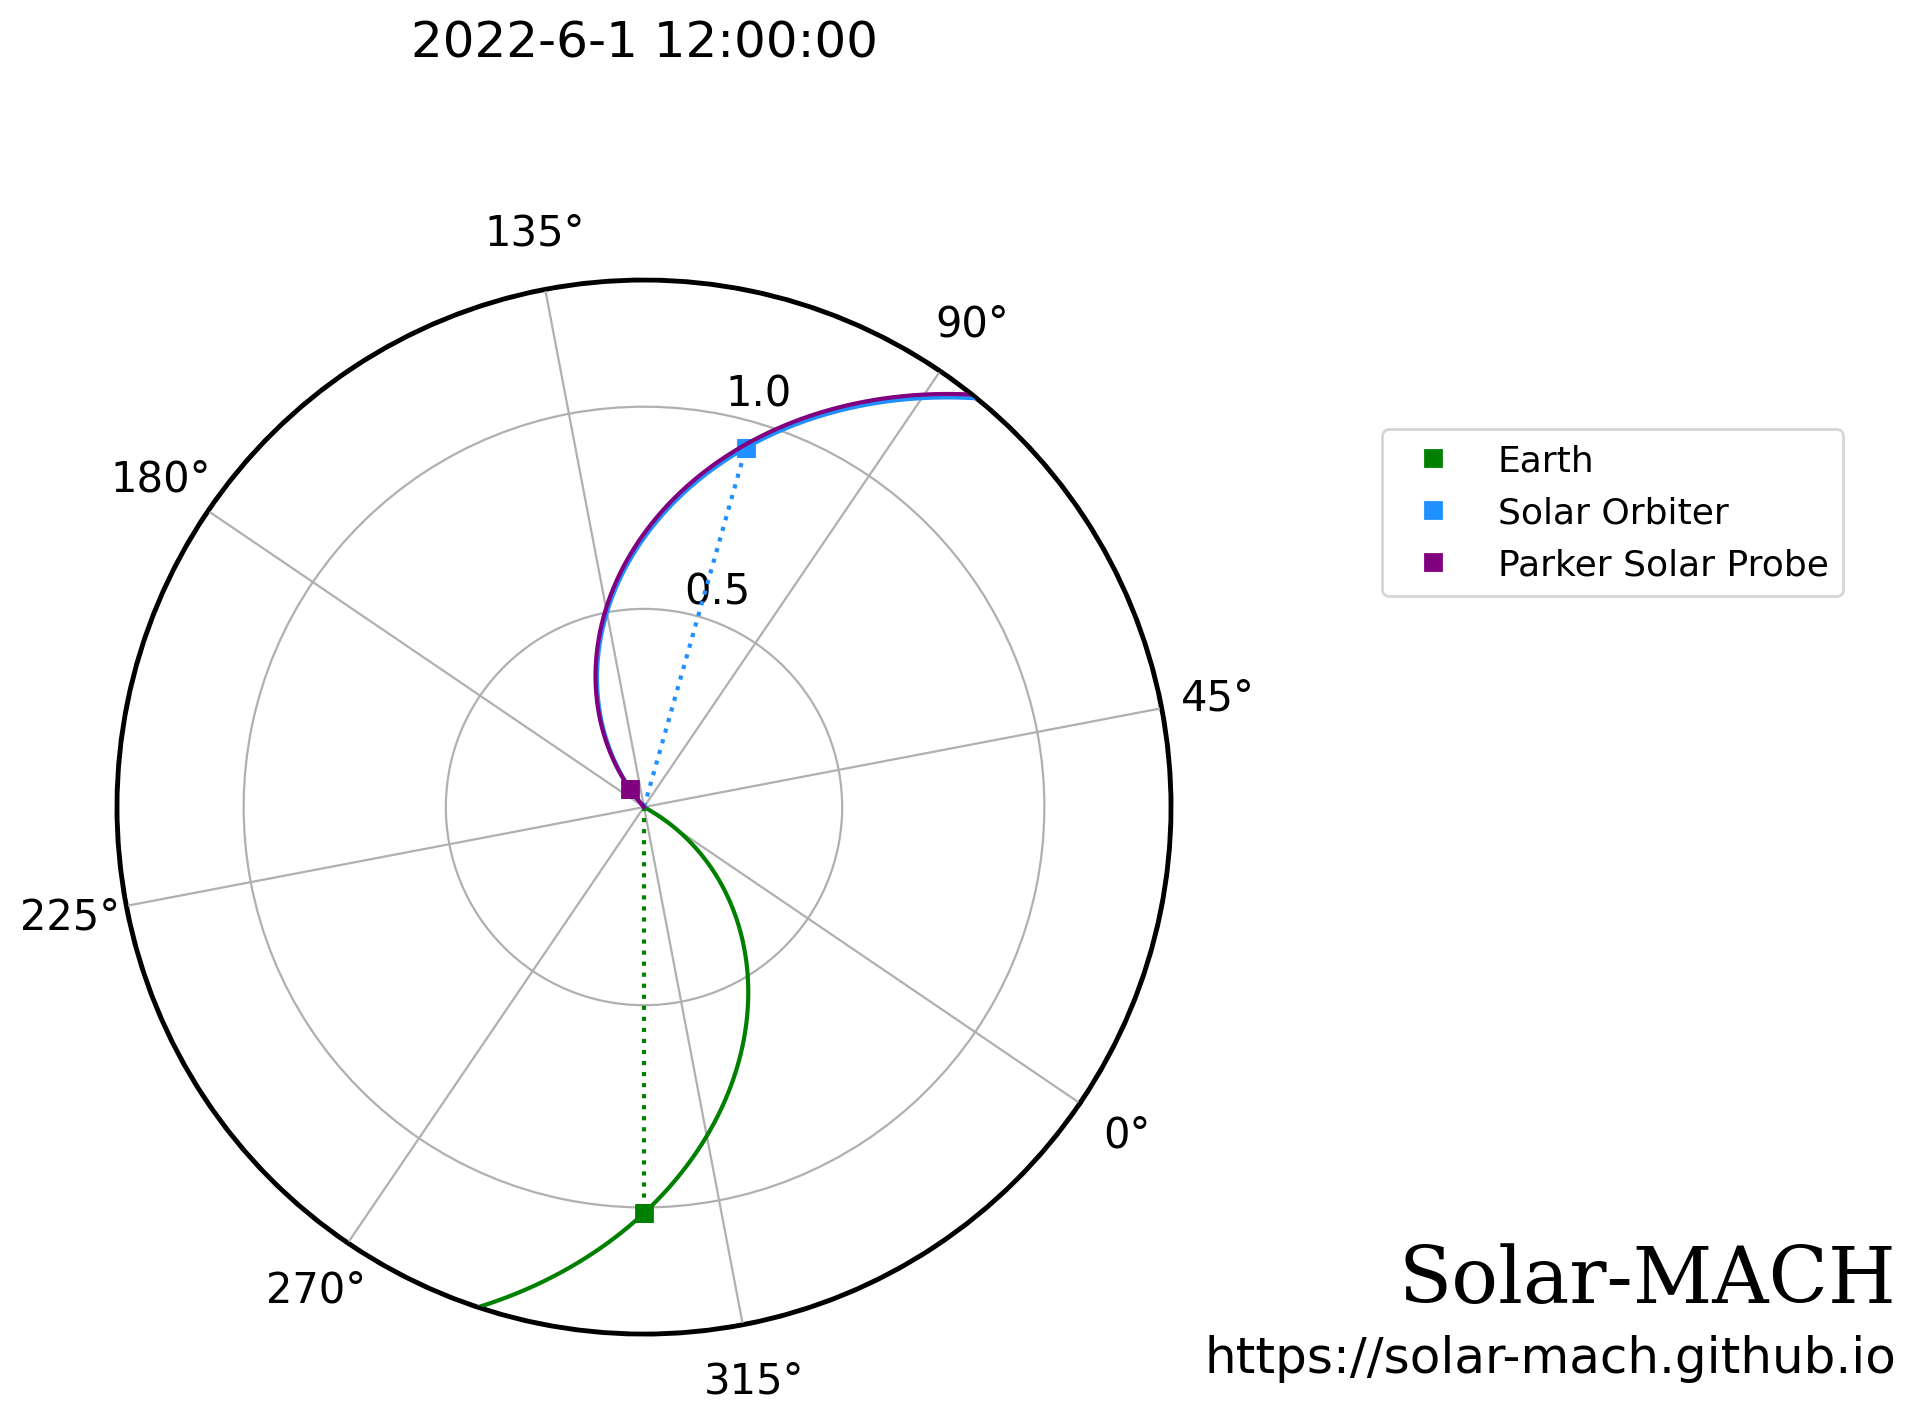

In [4]:
sm1.plot(plot_sun_body_line=True)

This plot shows a view from the top on the ecliptic plane with the Sun in the center and the Earth (indicated by green symbol) at "6 o'clock". The solid lines give estimations of single field lines of an ideal Parker heliospheric magnetic field connecting the corresponding observers to the Sun, while the dashed lines just indicate the line of sight from each of them to the Sun.

---

## 2. Example with all the details <a class="anchor" id="Example_all_details"></a>

First, get a list of available bodies/spacecraft:

In [5]:
print(print_body_list().index)

Index(['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'L1', 'STEREO B',
       'STEREO A', 'SOHO', 'Solar Orbiter', 'PSP', 'BepiColombo', 'MAVEN',
       'Mars Express', 'MESSENGER', 'Juno', 'Cassini', 'Rosetta', 'Pioneer10',
       'Pioneer11', 'Ulysses', 'Voyager1', 'Voyager2'],
      dtype='object', name='Key')


Provide the necessary options, this time for more spacecraft:

In [6]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]  # position-sensitive solar wind speed per body in body_list
date = '2021-6-1 12:00:00'

The default coordinate system is [Carrington coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html), alternatively one could select the Earth-centered [Stonyhurst coordinate](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) system:

In [7]:
coord_sys = 'Carrington'     # 'Carrington' (default) or 'Stoneyhurst'

Now we also want to indicate the position and direction of a flare, and the (assumed) solar wind speed at its location:

In [8]:
reference_long = 0            # Carrington longitude of reference (None to omit)
reference_lat = 0             # Carrington latitude of reference (None to omit)
reference_vsw = 400           # define solar wind speed at reference

In addition, we explicitly provide all availabe plotting options:

In [9]:
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = False    # plot straight line between Sun and body
long_offset = 0               # longitudinal offset for polar plot; defines where Earth's longitude is (by default 270, i.e., at "6 o'clock")
transparent = False           # make output figure background transparent
numbered_markers = True       # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

Finally, initializing and plotting with these options. If `outfile` is provided, the plot will be saved next to the Notebook with the provided `filename`.

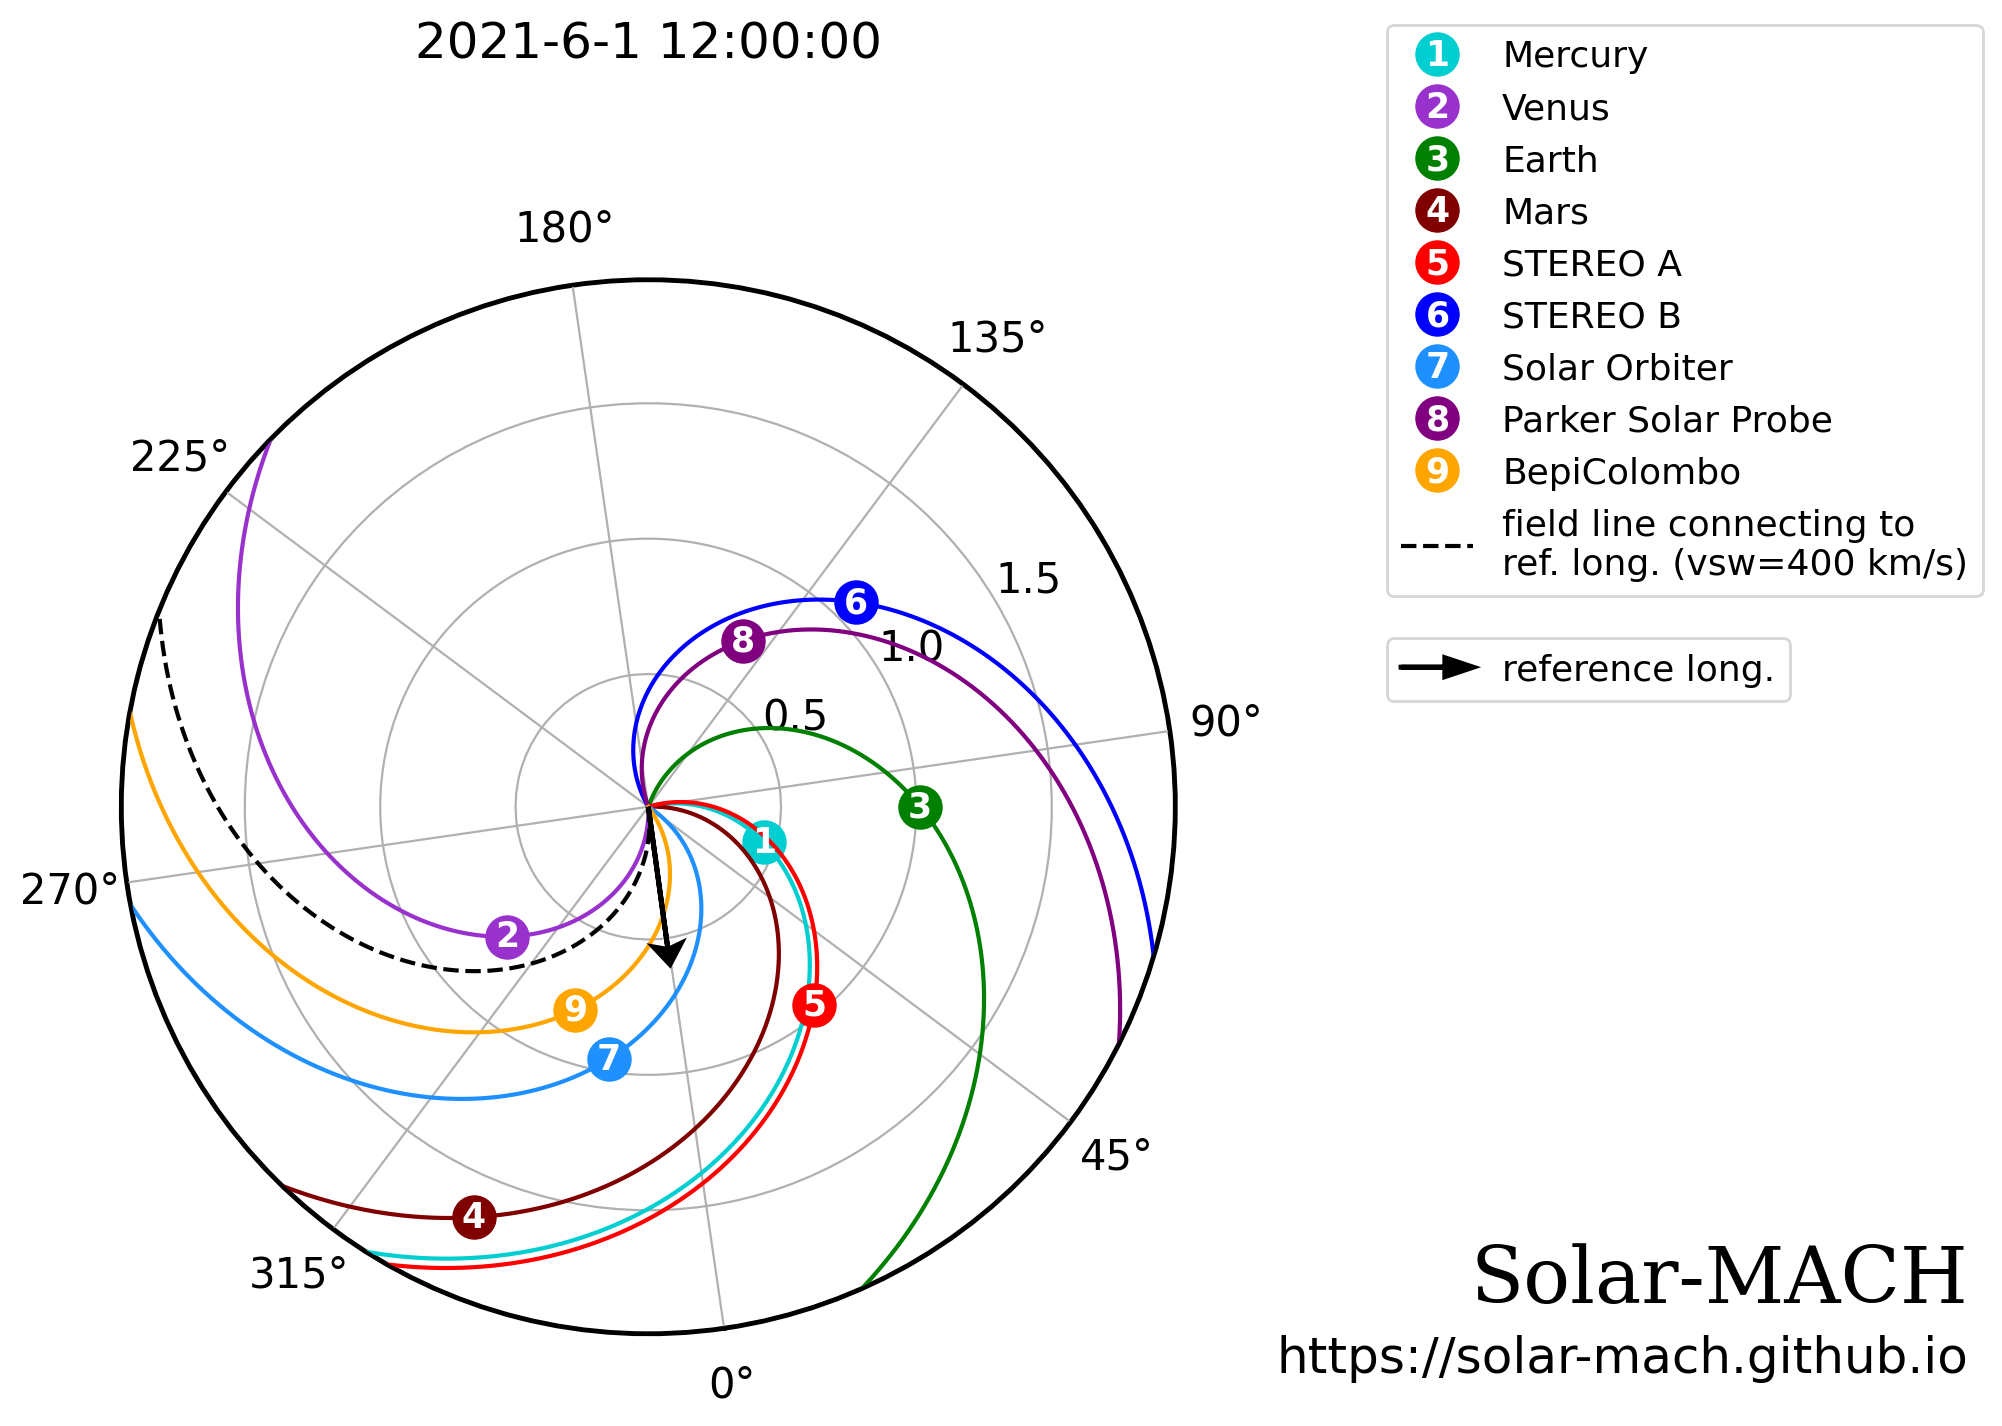

In [10]:
sm2 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)

sm2.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         long_offset=long_offset,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

All the data can also be obtained as a Pandas DataFrame for further use:

In [11]:
df = sm2.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,Mercury,64.6,-3.4,0.5,-17.2,-2.8,350,96.6,64.6,96.6,-3.4
1,Venus,304.3,-2.4,0.7,-137.4,-1.8,350,354.7,-55.7,-5.3,-2.4
2,Earth,81.7,-0.6,1.0,0.0,0.0,350,152.9,81.7,152.9,-0.6
3,Mars,328.7,-4.6,1.7,-113.0,-4.0,350,85.0,-31.3,85.0,-4.6
4,STEREO A,31.7,-6.0,1.0,-50.1,-5.4,350,99.3,31.7,99.3,-6.0
5,STEREO B,126.3,4.5,1.1,44.6,5.1,350,202.5,126.3,-157.5,4.5
6,Solar Orbiter,342.9,-1.0,1.0,-98.8,-0.4,350,49.7,-17.1,49.7,-1.0
7,PSP,142.0,3.2,0.7,60.3,3.8,350,192.3,142.0,-167.7,3.2
8,BepiColombo,332.0,-3.5,0.8,-109.8,-2.9,350,28.6,-28.0,28.6,-3.5


In [12]:
df['Heliocentric Distance (AU)'].values

array([0.45657717, 0.71866253, 1.0140839 , 1.65743876, 0.9633026 ,
       1.08583866, 0.95207518, 0.7155775 , 0.80726552])

---

## 3. Example using Stonyhurst coordinates for reference <a class="anchor" id="Example_stonyhurst"></a>

Let's take a look at the situation at the first ground-level enhancement (GLE) of solar cycle 25 on 28 October 2021 

First, we just provide some options as before:

In [13]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]        # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
coord_sys = 'Stoneyhurst'

# optional parameters
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = True     # plot straight line between Sun and body
transparent = False           # make output figure background transparent
numbered_markers = True       # plot each body with a numbered marker
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

But now we want to provide the coordinates of the flare in [Stonyhurst coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) (instead of [Carrington](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)).

In [14]:
reference_long = 2            # Stonyhurst longitude of reference (None to omit)
reference_lat = 26            # Stonyhurst latitude of reference (None to omit)
reference_vsw = 300           # define solar wind speed at reference

Finally, initializing and plotting with these options:

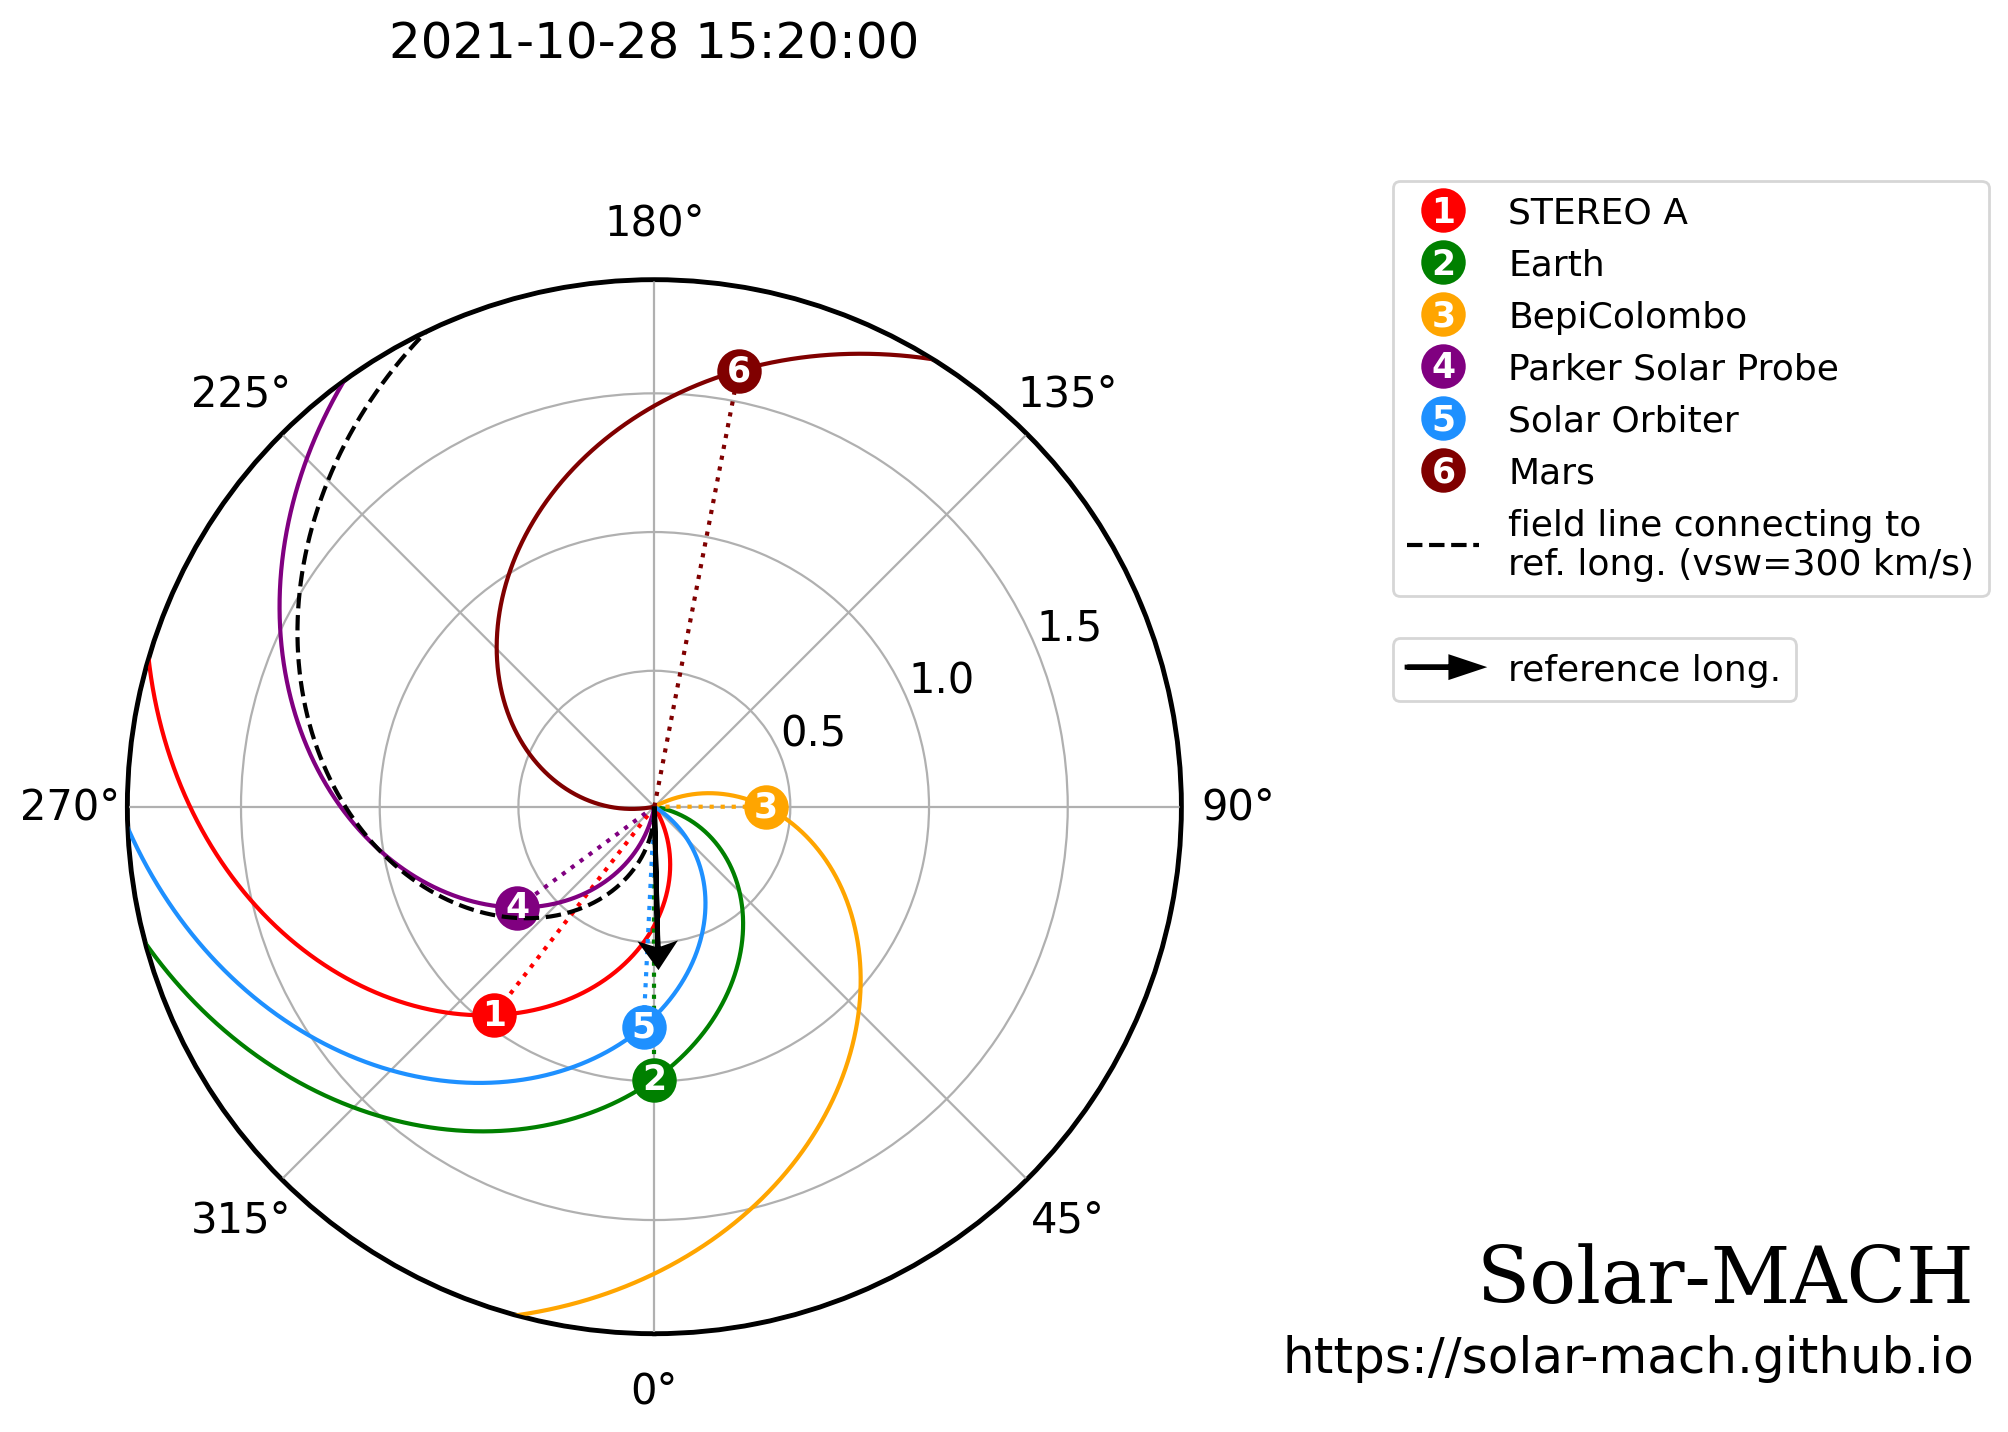

In [15]:
sm3 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)
sm3.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         reference_vsw=reference_vsw,
         transparent=transparent,
         numbered_markers=numbered_markers,
         outfile=filename
         )

---
## 4. Only obtain data as Pandas DataFrame <a class="anchor" id="only_dataframe"></a>

We can also just obtain a table with the spatial data, without producing a plot at all.

First provide necessary options:

In [16]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [400, 400, 400, 400, 400, 400]        # position-sensitive solar wind speed per body in body_list
date = '2022-6-1 12:00:00'

Then initialize `SolarMACH` and obtain data as Pandas DataFrame:

In [17]:
sm4 = SolarMACH(date, body_list, vsw_list)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,275.7,-4.0,1.0,-28.5,-3.4,400,334.7
1,Earth,304.2,-0.6,1.0,0.0,0.0,400,6.5
2,BepiColombo,330.3,-2.0,0.6,26.1,-1.3,400,5.3
3,PSP,162.1,-2.1,0.1,-142.0,-1.5,400,166.3
4,Solar Orbiter,108.4,2.1,0.9,-195.8,2.7,400,165.7
5,Mars,16.9,4.9,1.4,-287.3,5.5,400,101.9


If we also provide the `reference` information, it will be available in the table, too:

In [18]:
sm4 = SolarMACH(date, body_list, vsw_list, reference_long=273, reference_lat=7)
df = sm4.coord_table
display(df)

,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington),Longitudinal separation between body and reference_long,Longitudinal separation between body's mangetic footpoint and reference_long,Latitudinal separation between body and reference_lat
0,STEREO-A,275.7,-4.0,1.0,-28.5,-3.4,400,334.7,2.7,61.7,-11.0
1,Earth,304.2,-0.6,1.0,0.0,0.0,400,6.5,31.2,93.5,-7.6
2,BepiColombo,330.3,-2.0,0.6,26.1,-1.3,400,5.3,57.3,92.3,-9.0
3,PSP,162.1,-2.1,0.1,-142.0,-1.5,400,166.3,-110.9,-106.7,-9.1
4,Solar Orbiter,108.4,2.1,0.9,-195.8,2.7,400,165.7,-164.6,-107.3,-4.9
5,Mars,16.9,4.9,1.4,-287.3,5.5,400,101.9,-256.1,-171.1,-2.1


Note again that by default all coordinates are given in Carrington coordinates (as indicated in the column titles). To have this data in Stoneyhurst coordinates, define the `coord_sys` when initilizing `SolarMACH`:

In [19]:
sm5 = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
df = sm5.coord_table
display(df)

,Spacecraft/Body,Stonyhurst Longitude (°),Stonyhurst Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Stonyhurst)
0,STEREO-A,-28.5,-4.0,1.0,-28.5,-3.4,400,30.6
1,Earth,-0.0,-0.6,1.0,0.0,0.0,400,62.3
2,BepiColombo,26.1,-2.0,0.6,26.1,-1.3,400,61.1
3,PSP,-142.0,-2.1,0.1,-142.0,-1.5,400,-137.9
4,Solar Orbiter,164.2,2.1,0.9,164.2,2.7,400,221.5
5,Mars,72.7,4.9,1.4,72.7,5.5,400,157.7


---
# 5. Advanced: edit the figure <a class="anchor" id="edit_figure"></a>
Let's produce again the figure for the Oct 2021 GLE event.

In [20]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]  # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
sm6 = SolarMACH(date, body_list, vsw_list)

But now we prodive the option `return_plot_object=True` to the `plot()` call, so that the matplotlib figure and axis object will be returned:

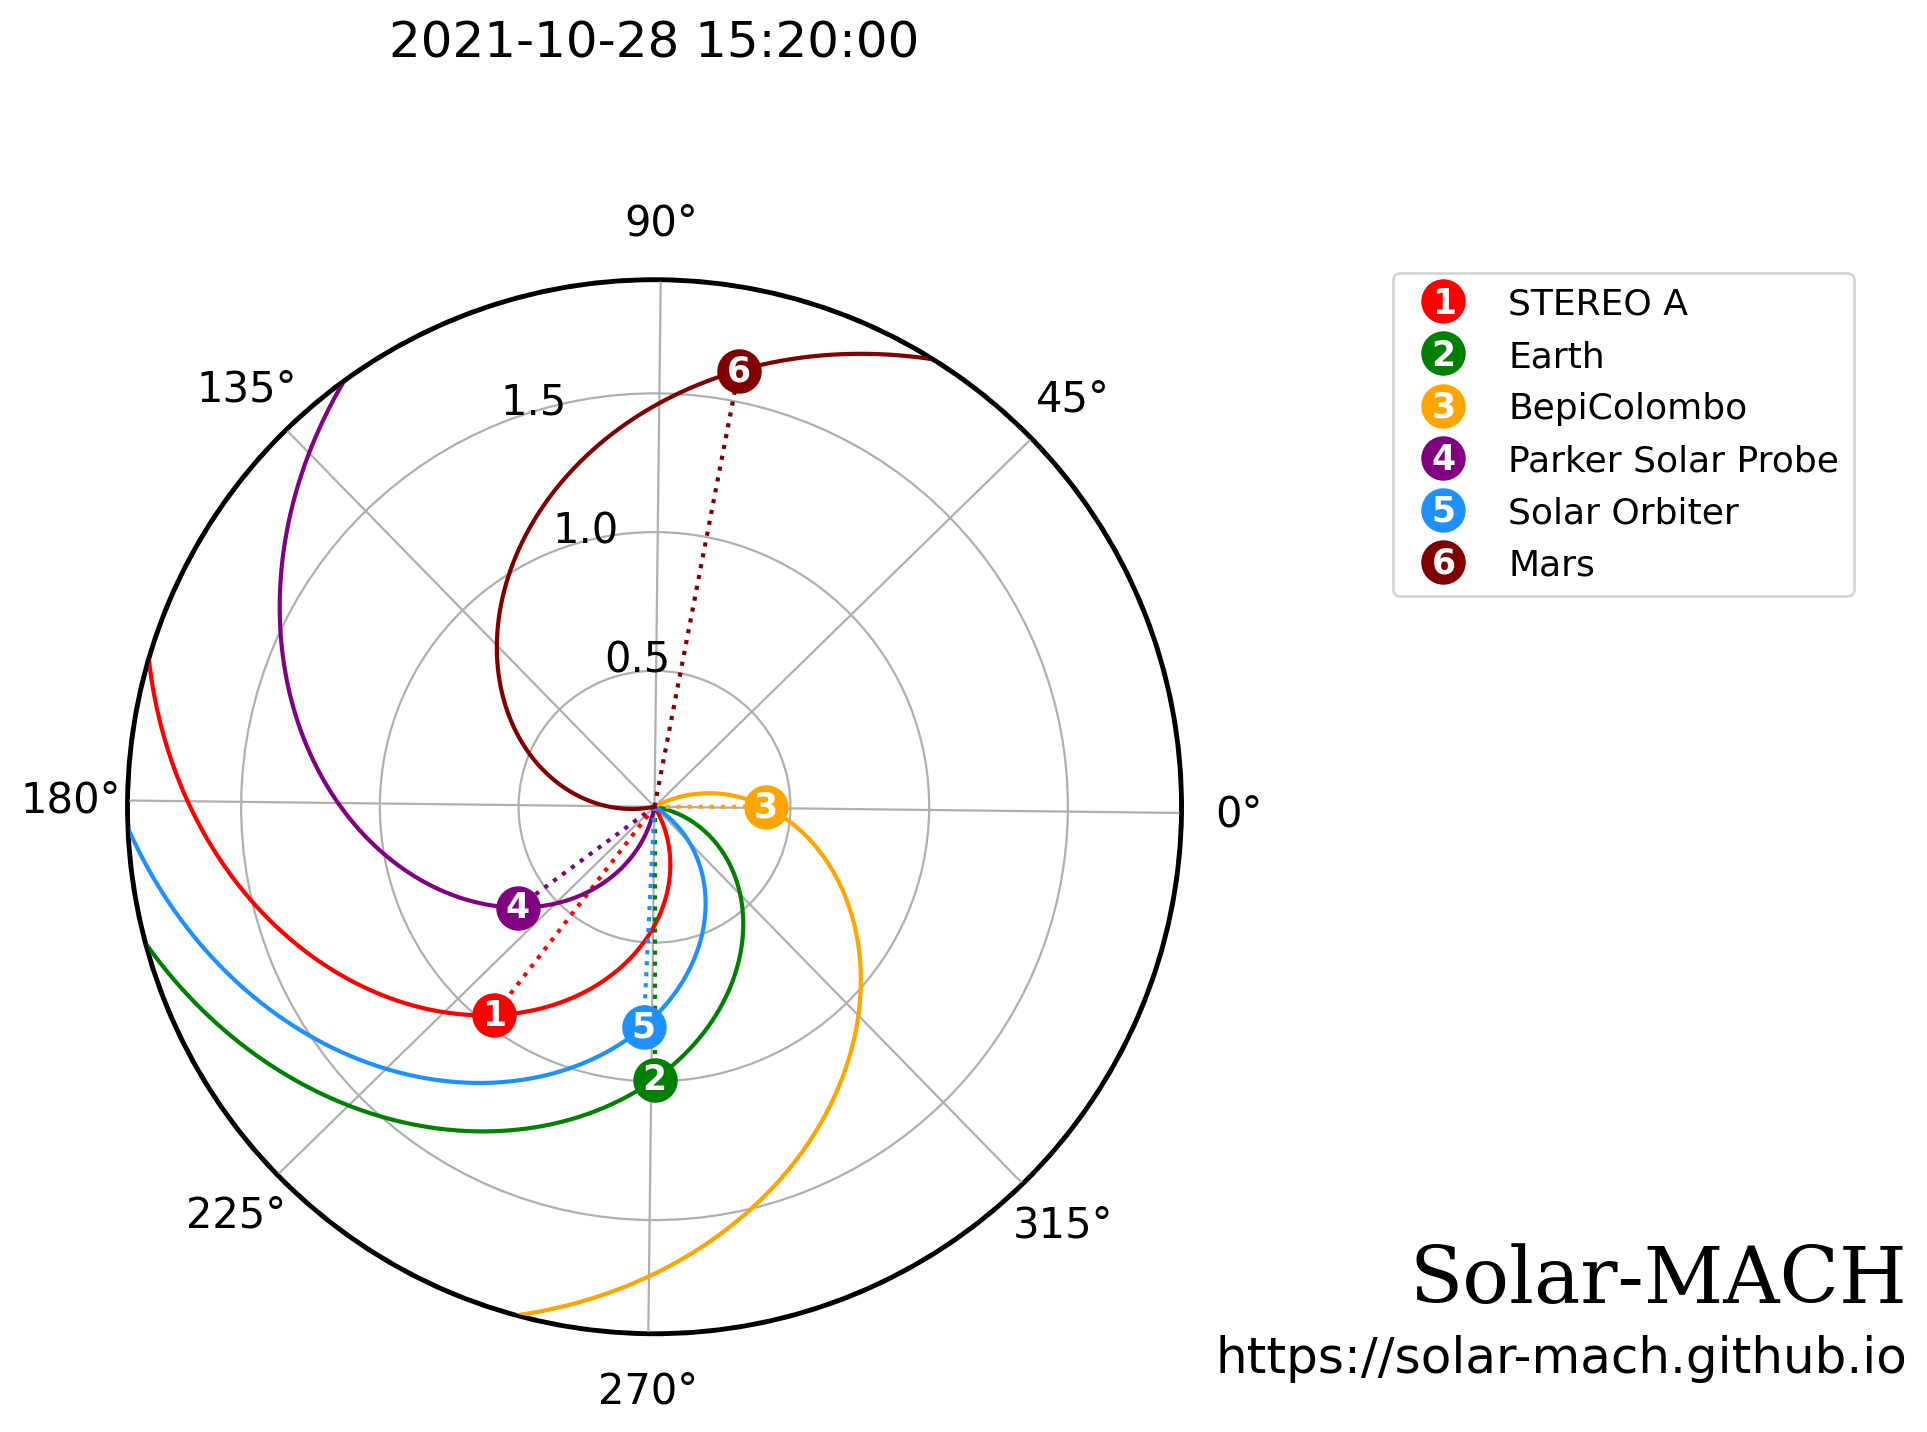

In [21]:
fig, ax = sm6.plot(plot_spirals=True,
                   plot_sun_body_line=True,
                   transparent=False,
                   numbered_markers=True,
                   return_plot_object=True
                  )

Now we can make some post-adjustments to the figure (requires of course some Python knowledge):

In [22]:
ax.set_title("What's that?! A new title!", pad=60)

Text(0.5, 1.0, "What's that?! A new title!")

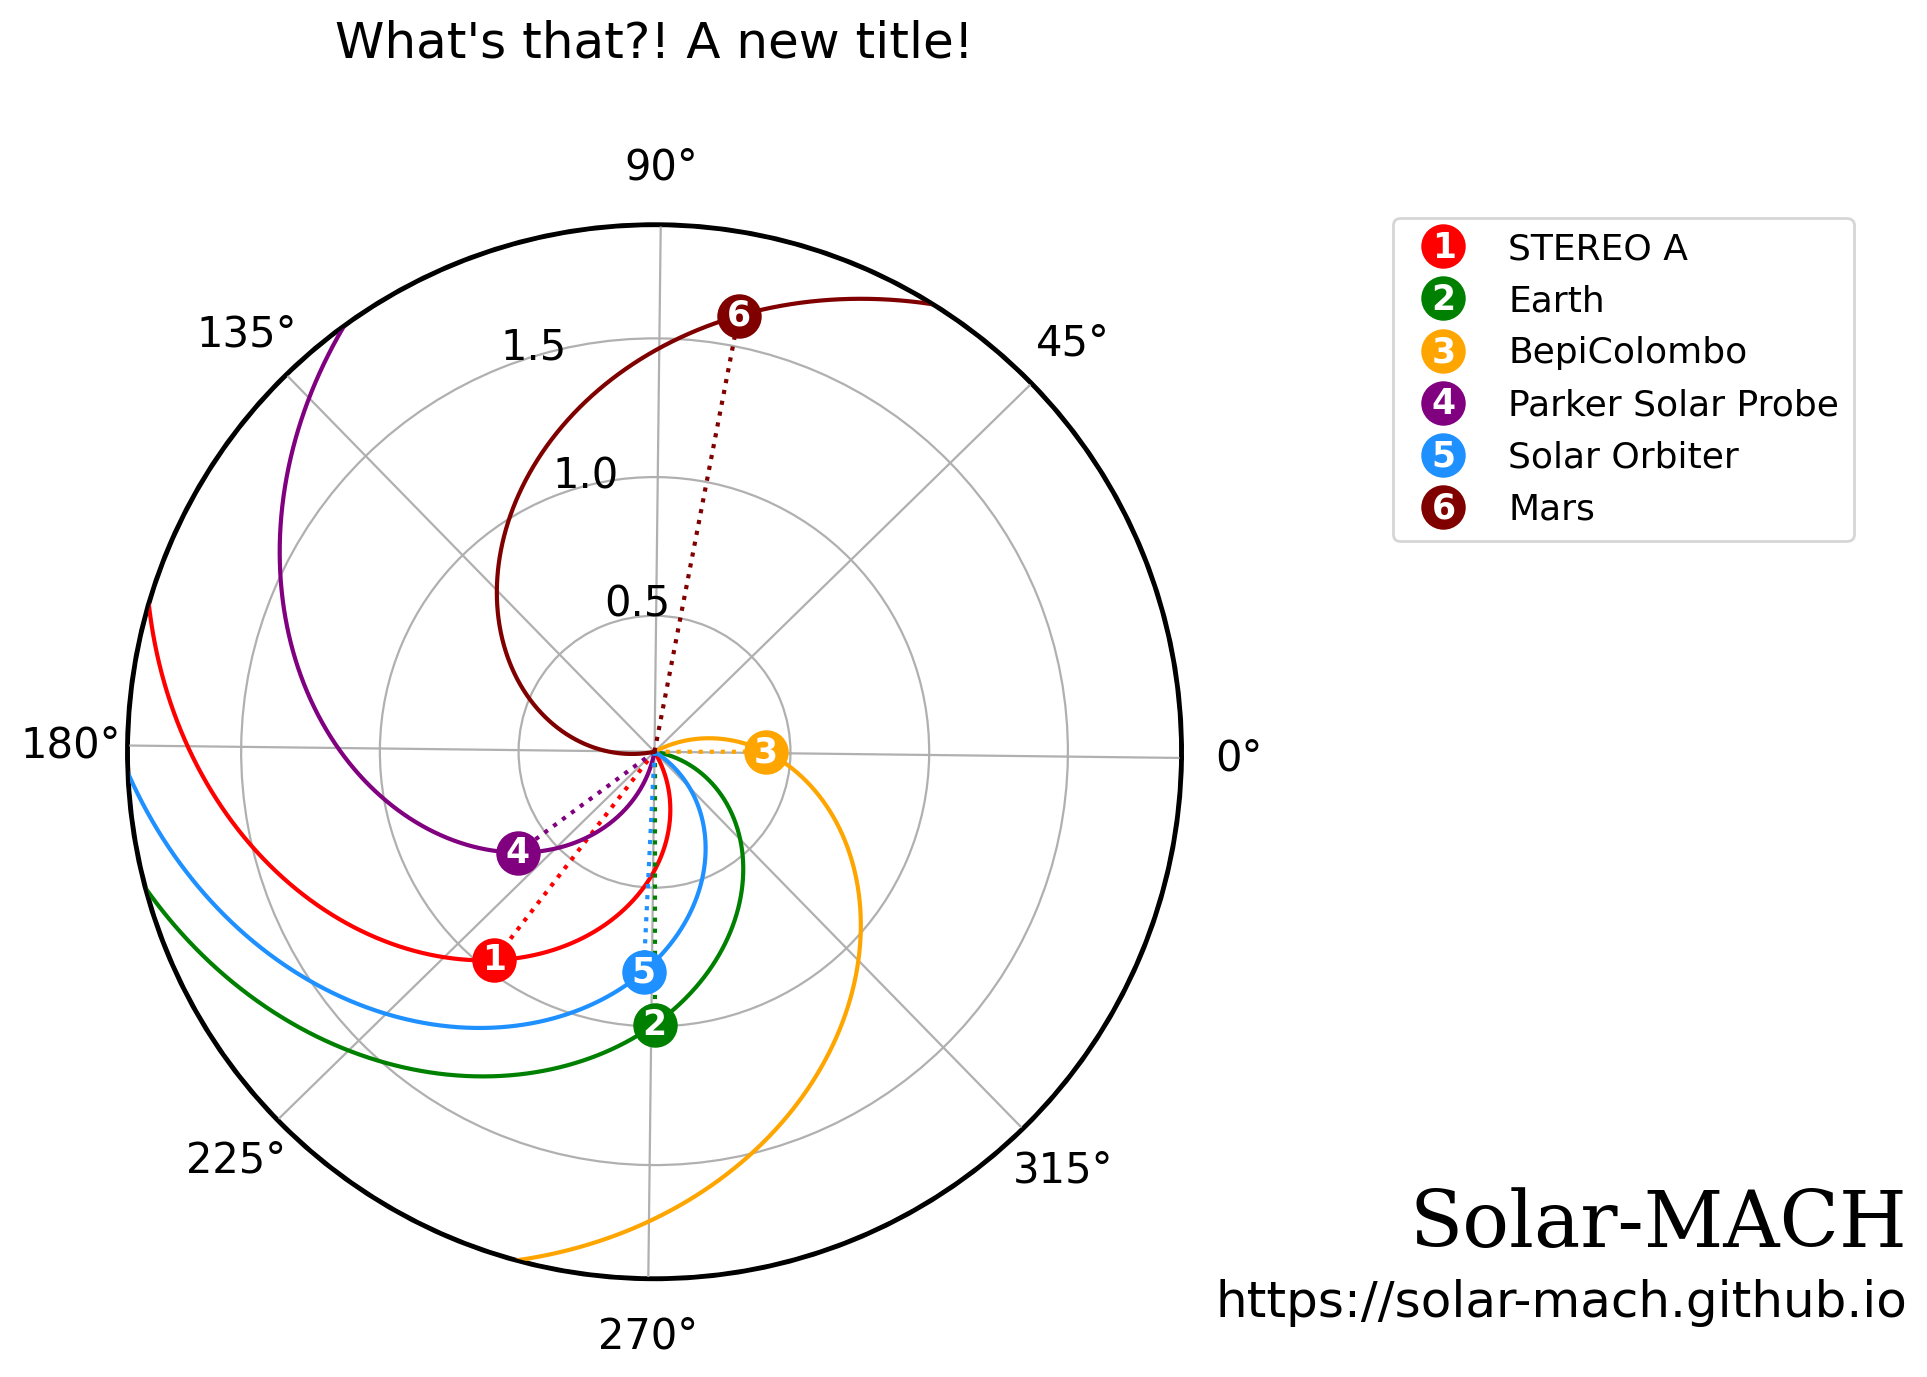

In [23]:
fig

---
# 6. Ideas for further usage <a class="anchor" id="ideas_further_usage"></a>

## 6.1 Loop over multiple datetimes (plots) <a class="anchor" id="loop_datetimes_plots"></a>

This might be useful to either:

- read-in an *event catalog*, and loop over those datetimes to quickly get the constellations of all these events,
- create a series of daily constellation plots, and combine them into one animation:

In [ ]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]                # position-sensitive solar wind speed per body in body_list
plot_spirals = True                              # plot Parker spirals for each body
plot_sun_body_line = False                       # plot straight line between Sun and body
transparent = False                              # make output figure background transparent
numbered_markers = True                          # plot each body with a numbered marker

for i in range(2,19,1):    
    j = str(i).rjust(2, '0')
    date = f'2022-6-{j} 12:00:00'
    filename = f'animate_{date[:-9]}.png'        # define filename of output figure

    sm7 = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
    sm7.plot(plot_spirals=plot_spirals,
             plot_sun_body_line=plot_sun_body_line,
             transparent=transparent,
             numbered_markers=numbered_markers,
             outfile=filename
             )

Get a sorted list of the files just created using `glob`:

In [45]:
import glob
files = sorted(glob.glob(filename.replace(f'{i}', '*')))

Build an animated GIF out of these files using `imageio`:

In [48]:
import imageio
with imageio.get_writer('solarmach.gif', mode='I') as writer:
    for filename in files:
        image = imageio.imread(filename)
        writer.append_data(image)

When completed, this will have created an animated GIF file `solarmach.gif` in the same directory as this notebook (as well as a series of files `animate_DATE.png` that can be deleted).

## 6.2 Loop over multiple datetimes (only data) <a class="anchor" id="loop_datetimes_data"></a>

For example, to look for spacecraft alignments, like *"When are PSP and Solar Orbiter at the same magnetic footpoint?"*

In [27]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]  # position-sensitive solar wind speed per body in body_list

df = []
dates = []
for i in range(1,31,1):
    date = f'2022-6-{i} 12:00:00'

    sm8 = SolarMACH(date, body_list, vsw_list)
    df = df + [sm6.coord_table]
    dates = dates + [date]

In [28]:
display(df[0])
display(df[1])
display(df[2])

,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.1,7.2,1.0,-37.6,2.5,340,302.3
1,Earth,270.7,4.7,1.0,0.0,0.0,300,352.0
2,BepiColombo,0.6,0.9,0.4,-270.0,-3.8,350,29.5
3,PSP,217.0,3.9,0.6,-53.7,-0.9,350,260.8
4,Solar Orbiter,267.9,2.2,0.8,-2.8,-2.5,320,329.6
5,Mars,79.7,-4.9,1.6,-190.9,-9.6,350,192.8


,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.1,7.2,1.0,-37.6,2.5,340,302.3
1,Earth,270.7,4.7,1.0,0.0,0.0,300,352.0
2,BepiColombo,0.6,0.9,0.4,-270.0,-3.8,350,29.5
3,PSP,217.0,3.9,0.6,-53.7,-0.9,350,260.8
4,Solar Orbiter,267.9,2.2,0.8,-2.8,-2.5,320,329.6
5,Mars,79.7,-4.9,1.6,-190.9,-9.6,350,192.8


,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
0,STEREO-A,233.1,7.2,1.0,-37.6,2.5,340,302.3
1,Earth,270.7,4.7,1.0,0.0,0.0,300,352.0
2,BepiColombo,0.6,0.9,0.4,-270.0,-3.8,350,29.5
3,PSP,217.0,3.9,0.6,-53.7,-0.9,350,260.8
4,Solar Orbiter,267.9,2.2,0.8,-2.8,-2.5,320,329.6
5,Mars,79.7,-4.9,1.6,-190.9,-9.6,350,192.8


In [29]:
display(dates)

['2022-6-1 12:00:00',
 '2022-6-2 12:00:00',
 '2022-6-3 12:00:00',
 '2022-6-4 12:00:00',
 '2022-6-5 12:00:00',
 '2022-6-6 12:00:00',
 '2022-6-7 12:00:00',
 '2022-6-8 12:00:00',
 '2022-6-9 12:00:00',
 '2022-6-10 12:00:00',
 '2022-6-11 12:00:00',
 '2022-6-12 12:00:00',
 '2022-6-13 12:00:00',
 '2022-6-14 12:00:00',
 '2022-6-15 12:00:00',
 '2022-6-16 12:00:00',
 '2022-6-17 12:00:00',
 '2022-6-18 12:00:00',
 '2022-6-19 12:00:00',
 '2022-6-20 12:00:00',
 '2022-6-21 12:00:00',
 '2022-6-22 12:00:00',
 '2022-6-23 12:00:00',
 '2022-6-24 12:00:00',
 '2022-6-25 12:00:00',
 '2022-6-26 12:00:00',
 '2022-6-27 12:00:00',
 '2022-6-28 12:00:00',
 '2022-6-29 12:00:00',
 '2022-6-30 12:00:00']

---

# 7. Further backmapping with PFSS <a class="anchor" id="pfss"></a>

A recent extension to Solar-MACH is the ability to further extend the magnetic connection of an observer to the close vicinity of the Sun using a [Potential Field Source Surface (PFSS)](https://nso.edu/data/nisp-data/pfss/) model that connects the heliospheric magnetic field (HMF) to the solar corona. 

Let's first load again Solar-MACH for the April 17, 2021 event. We will use the outputs of it as inputs for the PFSS model.

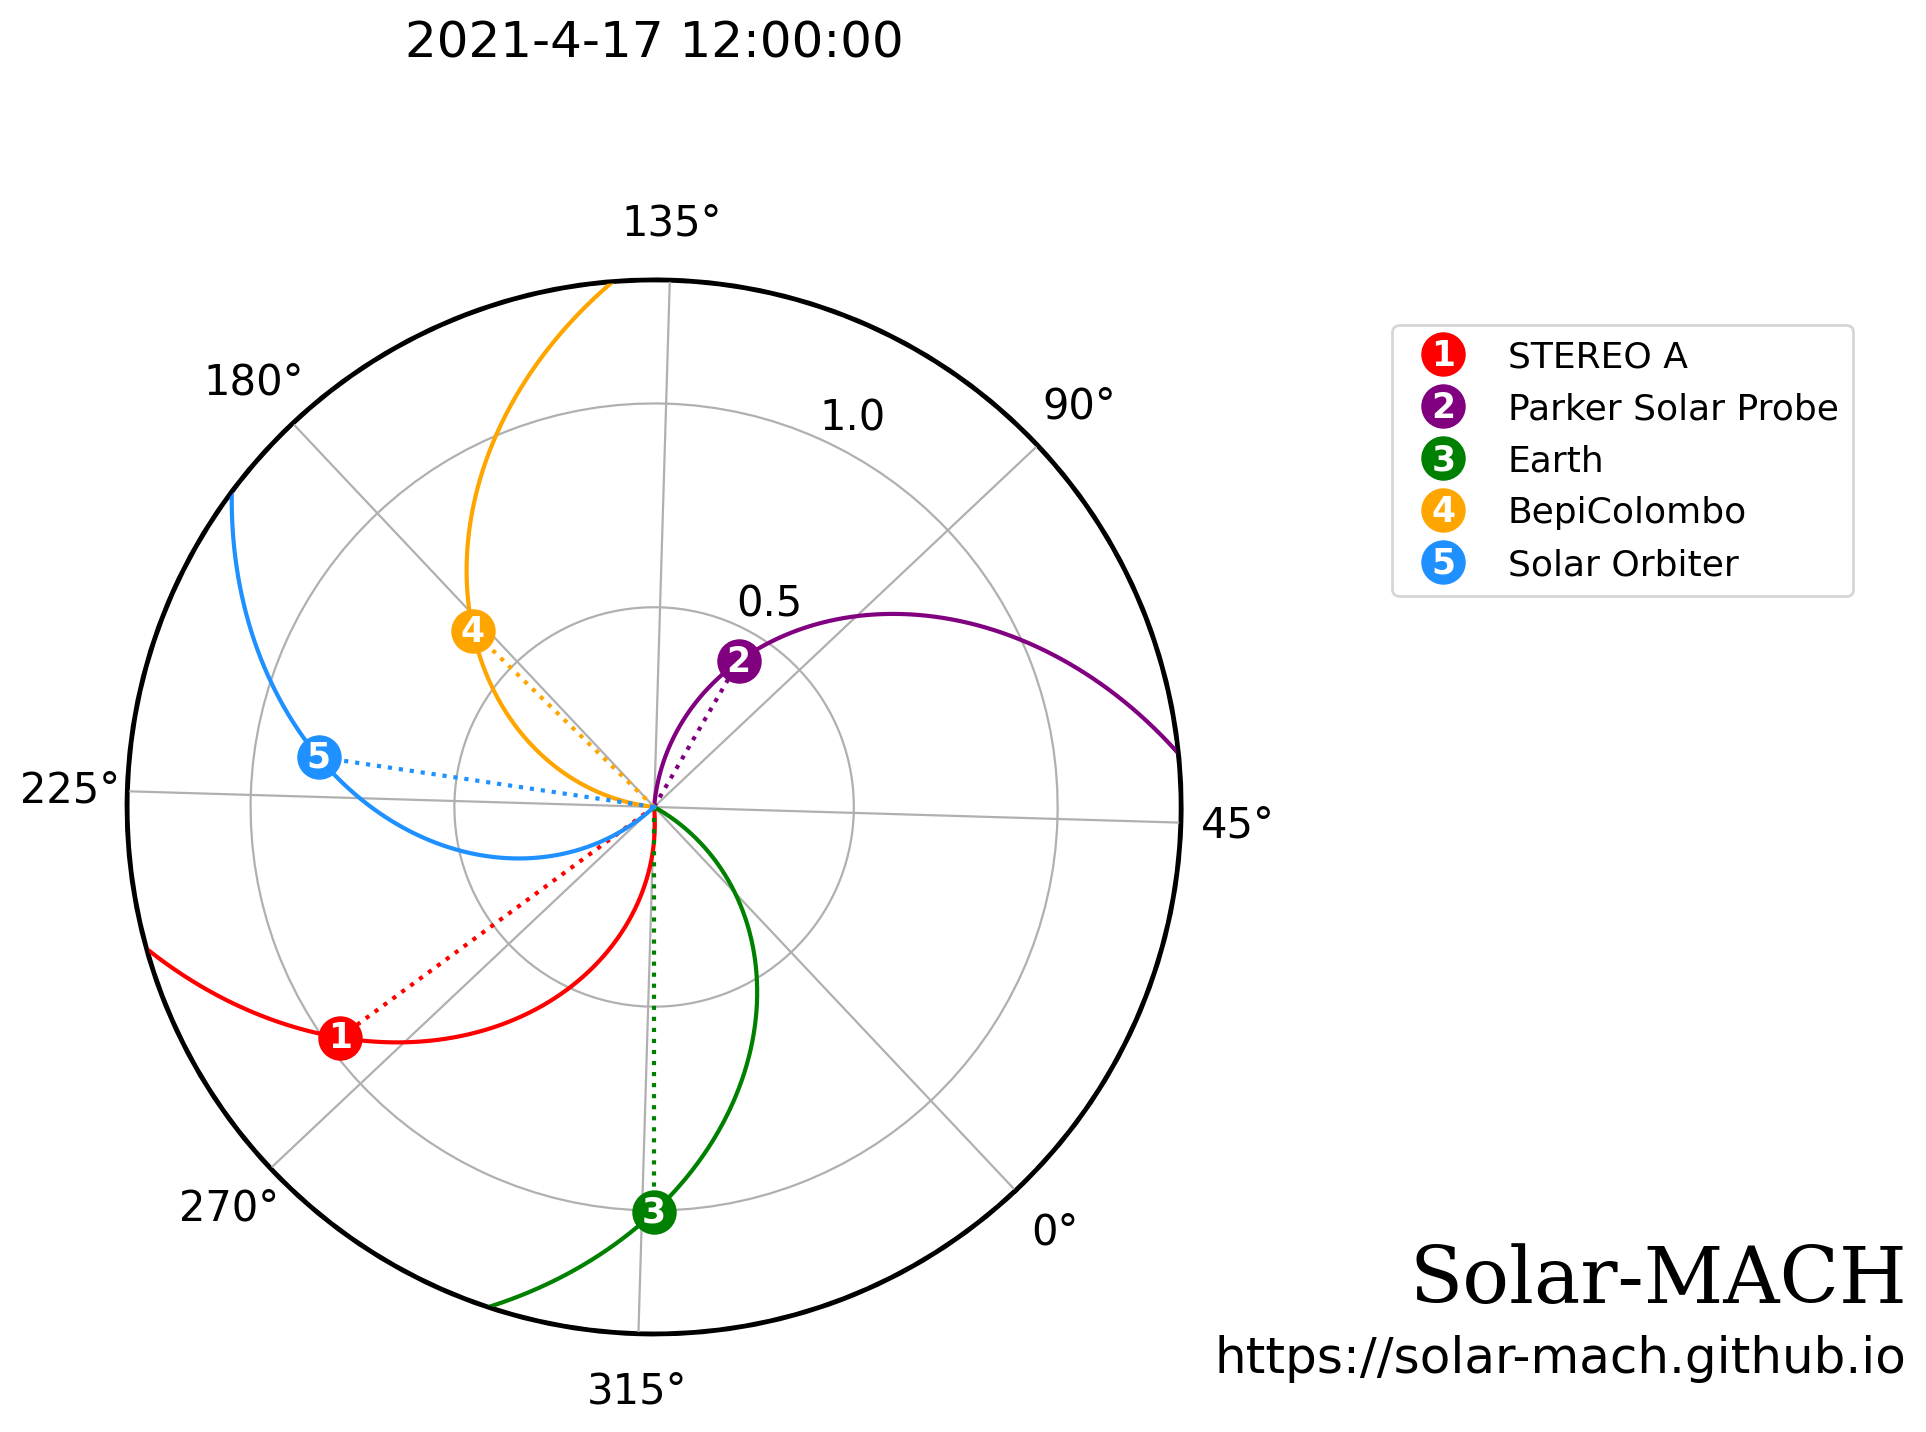

In [2]:
date = '2021-4-17 12:00:00'
body_list = ['STEREO-A', 'PSP', 'Earth', 'BepiColombo', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]   # position-sensitive solar wind speed per body in body_list

sm9 = SolarMACH(date, body_list, vsw_list)
sm9.plot(plot_spirals=True,
         plot_sun_body_line=True,
         transparent=False,
         numbered_markers=True,
         )

And obtain the data as a Pandas DataFrame with the observer as index:

In [3]:
df = sm9.coord_table.copy()
df.index = df['Spacecraft/Body']
display(df)

,Spacecraft/Body,Carrington Longitude (°),Carrington Latitude (°),Heliocentric Distance (AU),Longitudinal separation to Earth's longitude,Latitudinal separation to Earth's latitude,Vsw,Magnetic footpoint longitude (Carrington)
Spacecraft/Body,,,,,,,,
STEREO-A,STEREO-A,263.0,-7.2,1.0,-53.7,-1.8,400,322.3
PSP,PSP,106.6,3.8,0.4,-210.1,9.2,400,132.5
Earth,Earth,316.7,-5.4,1.0,0.0,0.0,400,18.3
BepiColombo,BepiColombo,182.6,0.1,0.6,-134.1,5.5,400,221.2
Solar Orbiter,Solar Orbiter,218.2,0.4,0.8,-98.5,5.8,400,270.0


#### Imports and fixed settings

The functions we use in this analysis are imported from the file `pfss_notebook_lib.py`. It must be in the same directory as this notebook.

In [4]:
from pfss_notebook_lib import *

# plt.rcParams['font.size'] = 20  # increase font size for matplotlib
# %matplotlib inline

# Where to save the magnetogram maps; if os.getcwd() they are saved next to this notebook:
filepath = os.getcwd()

### A registered user is needed for obtaining HMI maps through JSOC, which is needed to run this code! If you use this code on your own, please register at http://jsoc.stanford.edu/ajax/register_email.html, and then provide your email address in the following:

In [33]:
email = "name@example.com" 

#### Obtain HMI map for defined date and corresponding Carrington rotation number

This may take about half a minute when done for the first time (i.e., if there is no corresponding *PFSS_output_DATE_CRxxxx_xxx.p* file at `filepath`)

In [6]:
# if 'date' not defined here, the one from the above example for Solar-MACH will be used:
# date = '2021-4-17 12:00:00'

# carrington_rot = 2250  # manual CR
carrington_rot = sunpy.coordinates.sun.carrington_rotation_number(t=date).astype(int)  # dynamic CR from date
print(f'Obtaining HMI map for {date} (Carrington rotation no. {carrington_rot})')

# Obtain HMI map - don't change
hmimap = get_pfss_hmimap(filepath, email, carrington_rot, date)

Obtaining HMI map for 2021-4-17 12:00:00 (Carrington rotation no. 2243)
Searching for PFSS file from 
PFSS file not found.
Downloading...
Export request pending. [id=JSOC_20220830_942_X_IN, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 4MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Data shape:  (1440, 3600)
New shape:  (180, 360)


#### Provide additional settings. Options/values obtained from Solar-MACH above.

In [7]:
# names of the object(s)
# names = ['STEREO-A', 'PSP', 'Earth', 'BepiColombo', 'Solar Orbiter']
names = body_list

# solar wind speeds at the objects in km/s
# sw = [400, 400, 400, 400, 400]
sw = vsw_list

# distance to the objects in km
distance = au_to_km([df.loc['STEREO-A']['Heliocentric Distance (AU)'],
                     df.loc['PSP']['Heliocentric Distance (AU)'],
                     df.loc['Earth']['Heliocentric Distance (AU)'], 
                     df.loc['BepiColombo']['Heliocentric Distance (AU)'],
                     df.loc['Solar Orbiter']['Heliocentric Distance (AU)'] ])

# carrington longitude of the objects
lon = [df.loc['STEREO-A']['Carrington Longitude (°)'],
       df.loc['PSP']['Carrington Longitude (°)'],
       df.loc['Earth']['Carrington Longitude (°)'],
       df.loc['BepiColombo']['Carrington Longitude (°)'],
       df.loc['Solar Orbiter']['Carrington Longitude (°)'] ]

# carrington latitude of the objects
lat = [df.loc['STEREO-A']['Carrington Latitude (°)'],
       df.loc['PSP']['Carrington Latitude (°)'],
       df.loc['Earth']['Carrington Latitude (°)'],
       df.loc['BepiColombo']['Carrington Latitude (°)'],
       df.loc['Solar Orbiter']['Carrington Latitude (°)'] ]

# title of the figure
title = date.replace('/','-')

# produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = True
n_varies = 3

# boolean save switch
save = False

#### Generate figure (needs ~1min)

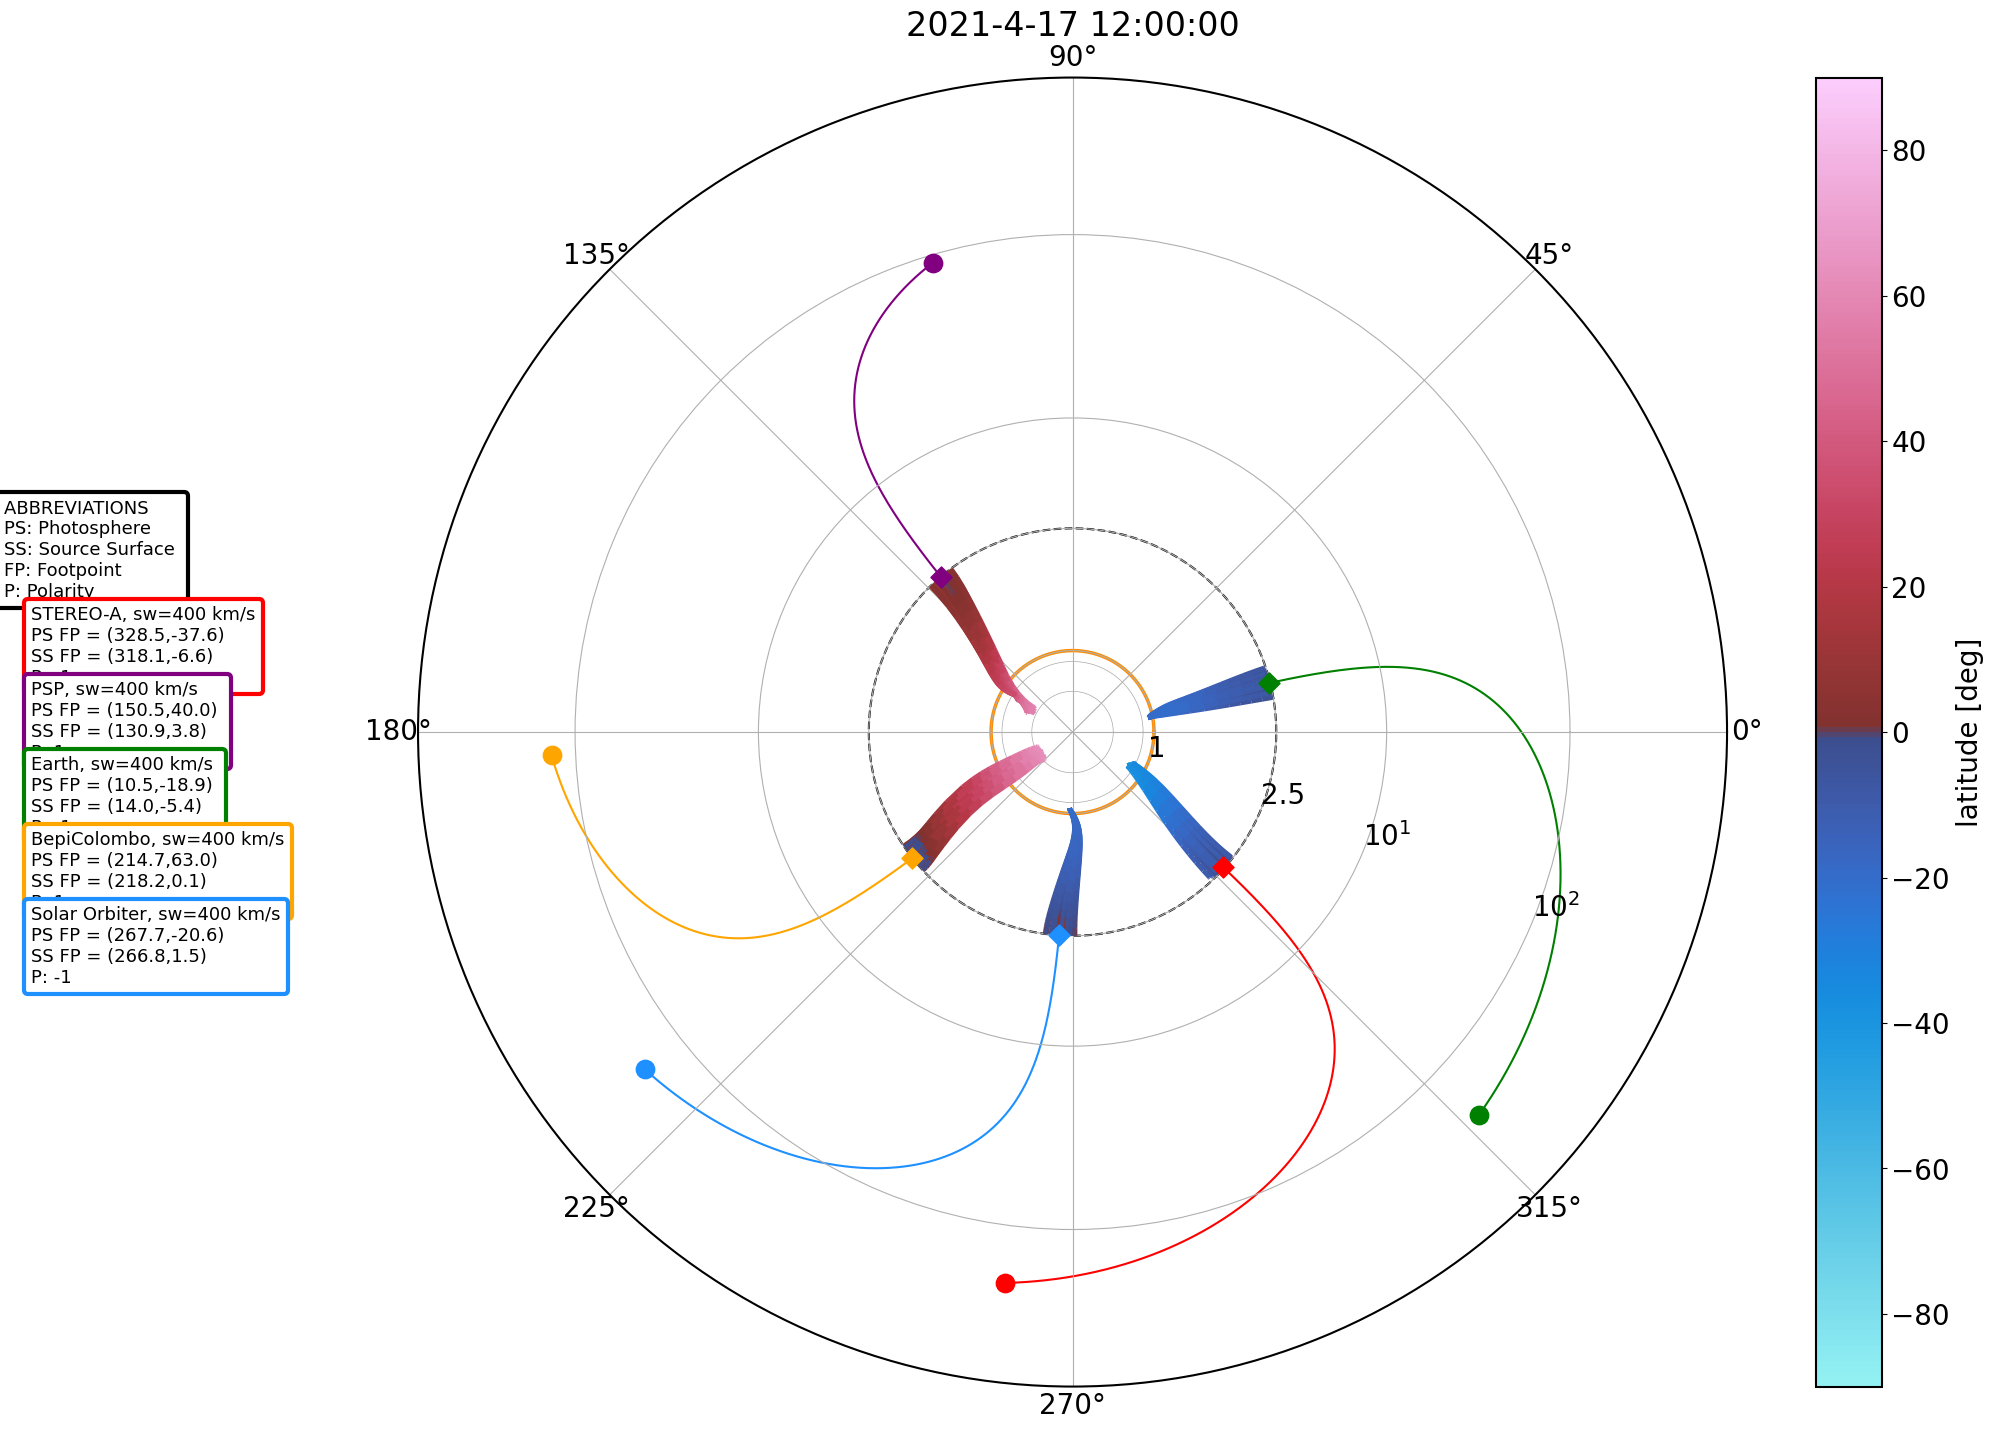

In [8]:
flines = symlog_pspiral(sw=sw, distance=distance, longitude=lon, latitude=lat, hmimap=hmimap,
                        names=names, title=title, vary=vary, n_varies=n_varies, save=save)

Note that the output figure combines linear and logarithmic scaling for the radial axis: Up to the PFSS at (usually) 2.5 solar radii the figure uses a linear scaling, whereas the main part of the heliosphere is shown with a logarithmic scale in radial distance. This allows to highlight the magnetic connections close to the Sun, while maintaining the connection further out in interplanetary space. The color coding below the PFSS indicates the corresponding latitudes.

#### The preceding cell returns *all* the traced sub-pfss field lines (i.e., for all spacecraft). In the following, we want to take a closer look at either the xy, xz, or yz projection. For that, we need to do the analysis for only one spacecraft.

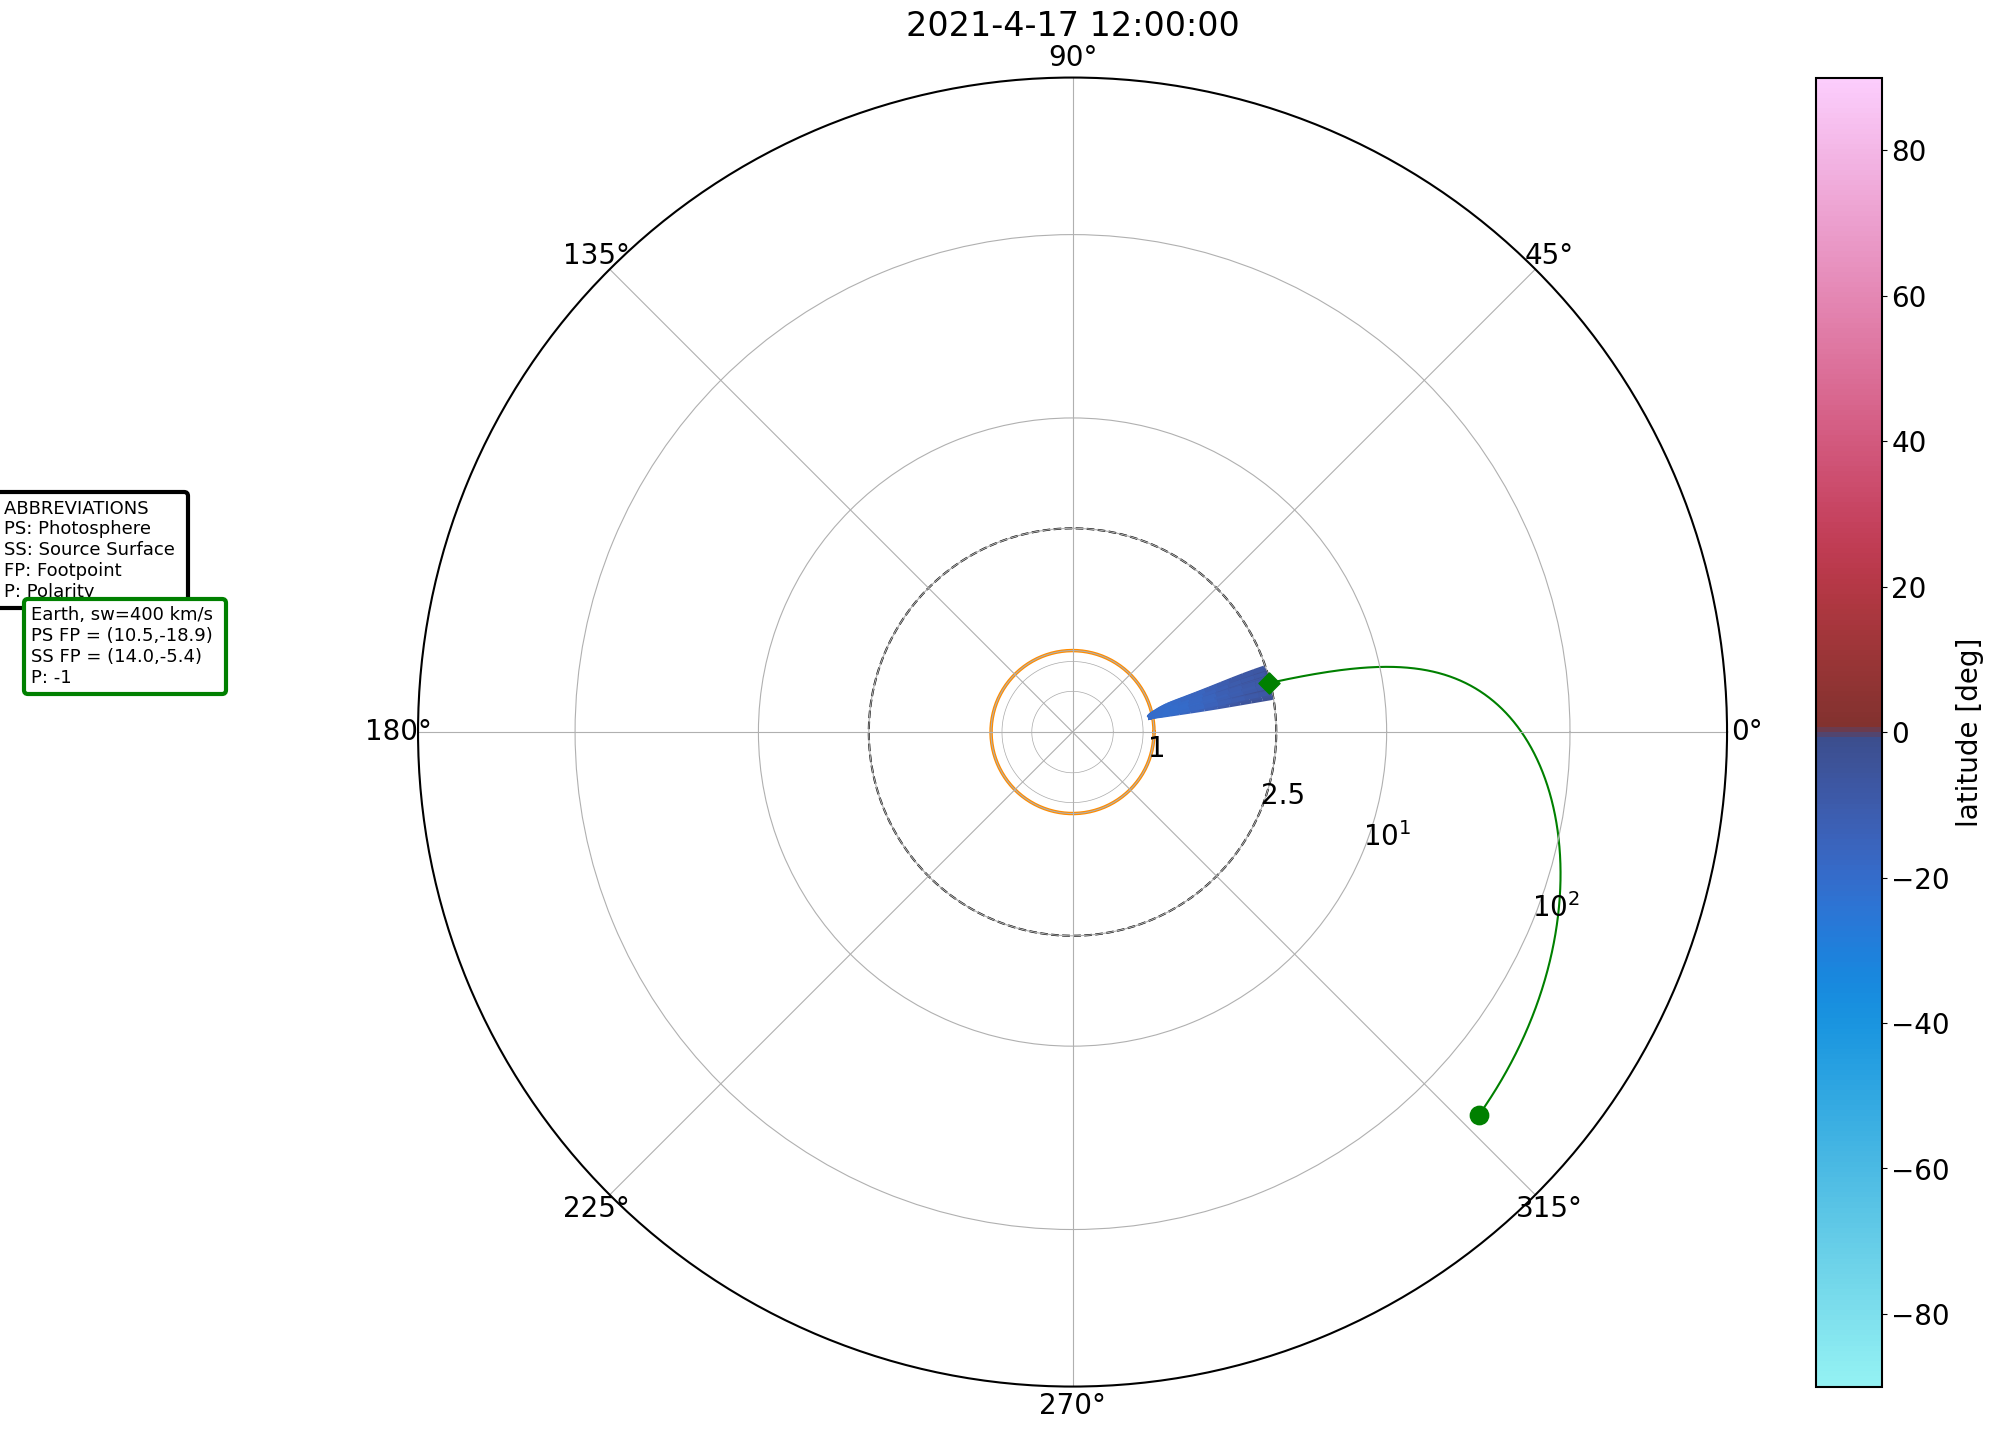

In [9]:
# select spacecraft
sc = 'Earth'

# names of the object(s)
names = [sc]

# solar wind speeds at the objects in km/s
sw = [400]

# distance to the objects in km
distance = au_to_km([df.loc[sc]['Heliocentric Distance (AU)']])
                    
# carrington longitude of the objects
lon = [df.loc[sc]['Carrington Longitude (°)']]

# carrington latitude of the objects
lat = [df.loc[sc]['Carrington Latitude (°)']]

# title of the figure
title = date.replace('/','-')

# produce additional dummy field lines in a ring around the pfss footpoint and how many
vary = True
n_varies = 3

# boolean save switch
save = False

flines = symlog_pspiral(sw=sw, distance=distance, longitude=lon, latitude=lat, hmimap=hmimap,
                        names=names, title=title, vary=vary, n_varies=n_varies, save=save)

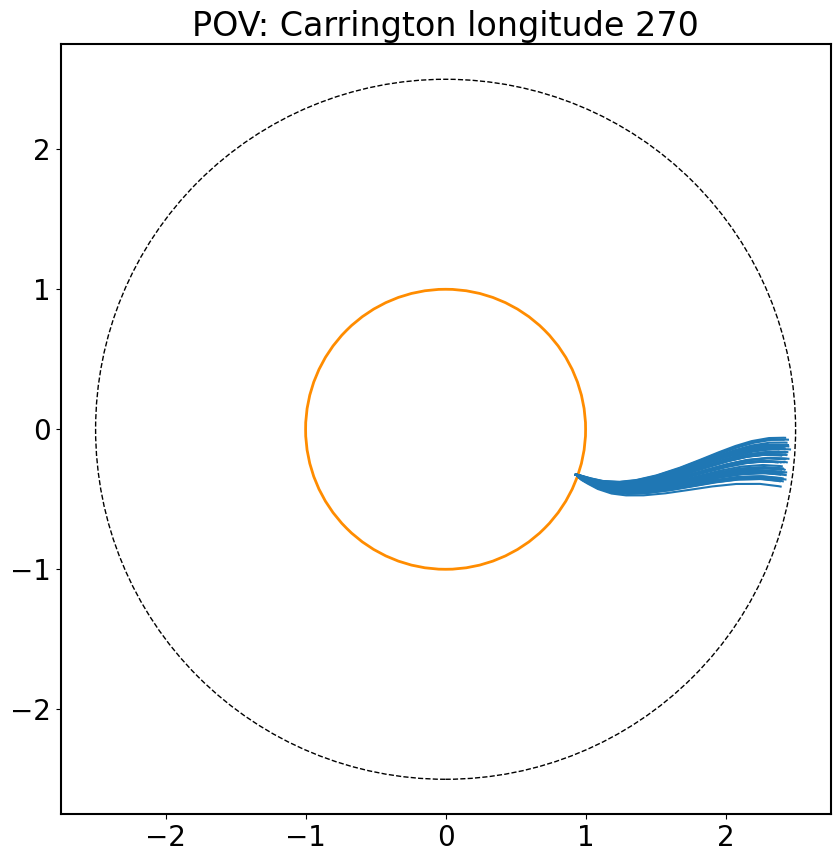

In [10]:
# Choose either xy, xz, or yz plane:
projection = 'xz'

draw_fieldlines(flines, frame=projection, names=names)
# draw_fieldlines(field_lines, rss=2.5, frame='yz', color_code='polarity', names=[], save=False)

<IPython.core.display.Javascript object>


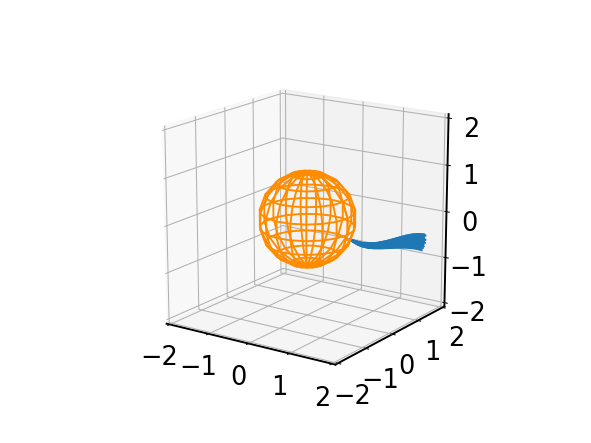

In [11]:
%matplotlib notebook
plot3d(flines, names)